Импортируем необходимые модули и функции

In [147]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
%matplotlib inline

Выбираем непрерывное экспненциальное распределение

In [148]:
expon_rv = sts.expon


Генерируем из него выборку объёма 1000 

In [149]:
lambda_ = 0.2
sample = expon_rv.rvs(scale = 1/lambda_,  size = 1000)
x = np.linspace(0,8,1000)

Строим гистограмму выборки и рисуем поверх неё теоретическую плотность распределения нашей случайной величины 

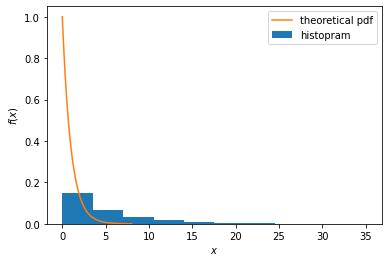

In [150]:
pdf = expon_rv.pdf(x)
plt.hist(sample, density=True, label='histopram')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()



Наша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) генерируем 1000 выборок объёма n.

In [151]:
array_n = np.array([3,5,10,50])
mean_array_dict = {}
for n in array_n:
  mean_array = np.array([])
  for i in range(1000):
    curr_sample = expon_rv.rvs(scale = 1/lambda_,  size = n)
    mean = curr_sample.mean()
    mean_array = np.append(mean_array, mean)
  #print(n, len(mean_array))
  mean_array_dict[n] = mean_array
#print(mean_array_dict)


Построим гистограммы распределений их выборочных средних.

Text(0, 0.5, '$f(x)$')

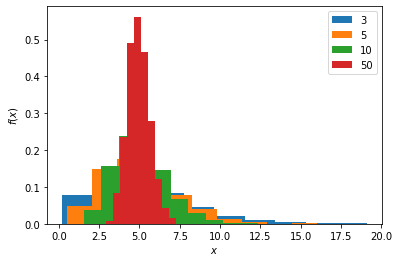

In [152]:
for n in mean_array_dict:
   plt.hist(mean_array_dict[n], label=n, density=True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Используя информацию о среднем и дисперсии экспоненциального распределения (EX = 1/lambda_,  DX = 1/(lambda_^2), посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних - N(EX, DX/n). 
Для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки.

In [153]:
EX = 1/lambda_ 
DX = 1/(lambda_**2)
print(EX, DX)



5.0 24.999999999999996


Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения (будем внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

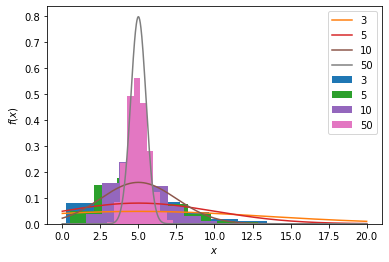

In [154]:
x = np.linspace(0,20,1000) 
for n in mean_array_dict:
   plt.hist(mean_array_dict[n], label=n, density=True)
   norm_rv = sts.norm(loc=EX, scale=DX/n)
   pdf = norm_rv.pdf(x)
   plt.plot(x, pdf, label=n)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

Опишем разницу между полученными распределениями при различных значениях n: при увеличении n дисперсия распределения выборочных средних экспоненциальной случайной величины сокращается, математическое ожидание остается неизменным. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n - точность аппроксимации возрастает.